In [207]:
import numpy as np

In [208]:
class SVM:
    def __init__(self):
        self.m = 1
        self.n = 1
        self.bias = 0
        self.weights = None
    
    def fit(self, X, y, iter, l_r, coef, a):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        for iterations in range(iter):
            for m in range(self.m):
                x_i = X[m]
                y_i = y[m]
                if self.get_margin(x_i, y_i) < 1:
                    dw = self.weights - coef * (x_i * y_i) + a * self.weights
                    db = (-1 * coef) * y_i
                else:
                    dw = self.weights + a * self.weights
                    db = 0
                self.weights -= l_r * dw
                self.bias -= l_r * db

    def predict(self, X):
        predict = []
        m = X.shape[0]
        for i in range(m):
            x_i = X[i]
            if x_i @ self.weights + self.bias >= 0:
                predict.append(1)
            else:
                predict.append(-1)
        return predict

    def get_margin(self, X, y):
        return (X @ self.weights + self.bias) * y
    

In [209]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [210]:
# Генерация синтетического датасета
X, y = make_classification(
    n_samples=50,  # Количество строк
    n_features=2,  # Количество признаков
    n_informative=2,  # Количество информативных признаков
    n_redundant=0,  # Количество избыточных признаков
    n_clusters_per_class=1,  # Количество кластеров на класс
    random_state=42  # Для воспроизводимости
)

# Преобразуем метки классов в {-1, 1}
y = np.where(y == 0, -1, 1)

In [211]:
model = SVM()
model.fit(X, y, iter=1500, l_r=0.1, coef=0.5, a=1)

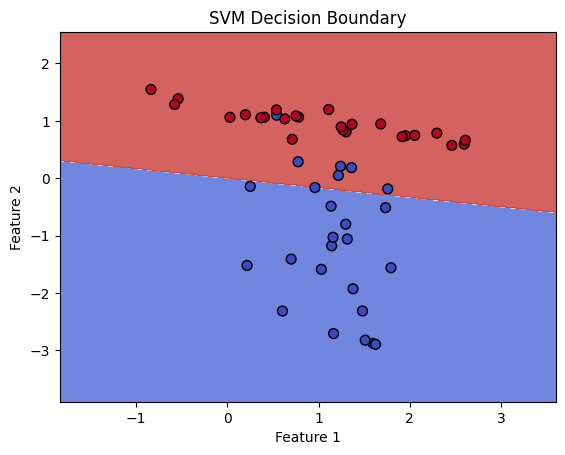

In [212]:
# Функция для визуализации
def plot_decision_boundary(X, y, model):
    # Сетка для построения границы
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказание для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    # Построение графика
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Визуализация
plot_decision_boundary(X, y, model)